Problem Statement:

Clustering:

Digital Ads Data:

The ads24x7 is a Digital Marketing company which has now got seed funding of $10 Million. They are expanding their wings in Marketing Analytics. They collected data from their Marketing Intelligence team and now wants you (their newly appointed data analyst) to segment type of ads based on the features provided. Use Clustering procedure to segment ads into homogeneous groups.

The following three features are commonly used in digital marketing:

CPM = (Total Campaign Spend / Number of Impressions) * 1,000

CPC = Total Cost (spend) / Number of Clicks

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

Perform the following in given order:

Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc. Treat missing values in CPC, CTR and CPM using the formula given. (You may refer to the Bank_KMeans Case Study to understand the coding behind treating the missing values using a specific formula). You have to basically create an user defined function and then call the function for imputing. Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst). Perform z-score scaling and discuss how it affects the speed of the algorithm. Perform clustering and do the following: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance. Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm. Print silhouette scores for up to 10 clusters and identify optimum number of clusters. Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots.] Conclude the project by providing summary of your learnings. 



In [1]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans 
from scipy.stats import zscore

# Part 1 - Clustering: Read the data and perform basic analysis such as printing a few rows (head and tail), info, data summary, null values duplicate values, etc.

In [2]:
df = pd.read_excel ('Clustering+Clean+Ads_Data.xlsx')

In [3]:
df.head(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.0031,0.0,0.0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.0,0.35,0.0,0.0000,0.0,NaN
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.0,0.35,0.0,0.0000,0.0,NaN
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.0,0.35,0.0,0.0000,0.0,NaN
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.0,0.35,0.0,0.0000,0.0,NaN


In [4]:
df.tail(5)

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
25852,2020-10-1-5,Format5,720,300,216000,Inter222,Video,Desktop,Video,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25853,2020-11-18-2,Format4,120,600,72000,inter230,Video,Mobile,Video,7,1,1,1,0.07,0.35,0.0455,NaN,NaN,NaN
25854,2020-9-14-0,Format5,720,300,216000,Inter221,App,Mobile,Video,2,2,2,1,0.09,0.35,0.0585,NaN,NaN,NaN
25855,2020-9-30-4,Format7,300,600,180000,Inter228,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN
25856,2020-10-17-3,Format5,720,300,216000,Inter225,Video,Mobile,Display,1,1,1,0,0.01,0.35,0.0065,NaN,NaN,NaN


In [5]:
df.shape

(25857, 19)

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,25857.0,3.904312e+02,2.306961e+02,120.00,120.0000,300.0000,7.200000e+02,728.00
Ad- Width,25857.0,3.321828e+02,1.942609e+02,70.00,250.0000,300.0000,6.000000e+02,600.00
Ad Size,25857.0,9.968328e+04,6.264069e+04,33600.00,72000.0000,75000.0000,8.400000e+04,216000.00
Available_Impressions,25857.0,2.169621e+06,4.542680e+06,0.00,9133.0000,330968.0000,2.208484e+06,27592861.00
Matched_Queries,25857.0,1.155322e+06,2.407244e+06,0.00,5451.0000,189449.0000,1.008171e+06,14702025.00
Impressions,25857.0,1.107525e+06,2.326648e+06,0.00,2558.0000,162162.0000,9.496930e+05,14194774.00
Clicks,25857.0,9.525881e+03,1.672169e+04,0.00,305.0000,3457.0000,1.068100e+04,143049.00
Spend,25857.0,2.414473e+03,3.932835e+03,0.00,36.0300,1173.6600,2.692280e+03,26931.87
Fee,25857.0,3.367289e-01,3.053978e-02,0.21,0.3500,0.3500,3.500000e-01,0.35
Revenue,25857.0,1.716549e+03,2.993025e+03,0.00,23.4200,762.8800,1.749982e+03,21276.18


In [7]:
df.duplicated().sum()

0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25857 entries, 0 to 25856
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Timestamp              25857 non-null  object 
 1   InventoryType          25857 non-null  object 
 2   Ad - Length            25857 non-null  int64  
 3   Ad- Width              25857 non-null  int64  
 4   Ad Size                25857 non-null  int64  
 5   Ad Type                25857 non-null  object 
 6   Platform               25857 non-null  object 
 7   Device Type            25857 non-null  object 
 8   Format                 25857 non-null  object 
 9   Available_Impressions  25857 non-null  int64  
 10  Matched_Queries        25857 non-null  int64  
 11  Impressions            25857 non-null  int64  
 12  Clicks                 25857 non-null  int64  
 13  Spend                  25857 non-null  float64
 14  Fee                    25857 non-null  float64
 15  Re

In [9]:
df.isna().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                      6465
CPM                      6465
CPC                      7527
dtype: int64

# Part 1 - Clustering: Treat missing values in CPC, CTR and CPM using the formula given.

In [10]:
def calculate_ctr(x):
    clicks=df.Clicks
    impressions=df.Impressions
    ctr= (clicks/(impressions)*100)
    return ctr

# CTR = Total Measured Clicks / Total Measured Ad Impressions x 100


def calculate_cpm(x):
    spend=df.Spend
    impressions=df.Impressions
    cpm= (spend/(impressions)*1000)
    return cpm

#CPM = (Total Campaign Spend / Number of Impressions) * 1,000



def calculate_cpc(x):
    spend=df.Spend
    clicks=df.Clicks
    cpc= (spend/(clicks))
    return cpc

#CPC = Total Cost (spend) / Number of Clicks



In [11]:
df['CTR']= df[['CTR']].apply(lambda x: calculate_ctr(x))
df['CPM']= df[['CPM']].apply(lambda x: calculate_cpm(x))
df['CPC']= df[['CPC']].apply(lambda x: calculate_cpc(x))


In [12]:
df.isna().sum()

Timestamp                   0
InventoryType               0
Ad - Length                 0
Ad- Width                   0
Ad Size                     0
Ad Type                     0
Platform                    0
Device Type                 0
Format                      0
Available_Impressions       0
Matched_Queries             0
Impressions                 0
Clicks                      0
Spend                       0
Fee                         0
Revenue                     0
CTR                       219
CPM                       219
CPC                      2586
dtype: int64

In [13]:
null_rows = df[df['CTR'].isnull() | df['CPM'].isnull() | df['CPC'].isnull()]

# checking relevant columns for analysing why its happening 
relevant_columns = ['Clicks', 'Impressions', 'Spend', 'CTR', 'CPM', 'CPC']
print(null_rows[relevant_columns])

      Clicks  Impressions  Spend  CTR  CPM  CPC
1          0          380    0.0  0.0  0.0  NaN
2          0          297    0.0  0.0  0.0  NaN
3          0          102    0.0  0.0  0.0  NaN
4          0          345    0.0  0.0  0.0  NaN
5          0          491    0.0  0.0  0.0  NaN
...      ...          ...    ...  ...  ...  ...
2681       0            1    0.0  0.0  0.0  NaN
2682       0            0    0.0  NaN  NaN  NaN
2683       0            1    0.0  0.0  0.0  NaN
2684       0            1    0.0  0.0  0.0  NaN
2685       0            0    0.0  NaN  NaN  NaN

[2586 rows x 6 columns]


here we observe that there are zero clicks in many cases, we can rather drop them but its also real data sinse many of them only have impressions, dropping those values will not hold good for further machine learning techniques as they might also be considered in making predictions for further use, running the formula over the variables which has zero will give infinty as a result let us alter the function and fix this issue 


In [14]:
# df = df.dropna()
#incase if u want to drop the missing rows but we dont prefer doing it here 

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,25857.0,3.904312e+02,2.306961e+02,120.00,120.000000,300.000000,7.200000e+02,728.00
Ad- Width,25857.0,3.321828e+02,1.942609e+02,70.00,250.000000,300.000000,6.000000e+02,600.00
Ad Size,25857.0,9.968328e+04,6.264069e+04,33600.00,72000.000000,75000.000000,8.400000e+04,216000.00
Available_Impressions,25857.0,2.169621e+06,4.542680e+06,0.00,9133.000000,330968.000000,2.208484e+06,27592861.00
Matched_Queries,25857.0,1.155322e+06,2.407244e+06,0.00,5451.000000,189449.000000,1.008171e+06,14702025.00
Impressions,25857.0,1.107525e+06,2.326648e+06,0.00,2558.000000,162162.000000,9.496930e+05,14194774.00
Clicks,25857.0,9.525881e+03,1.672169e+04,0.00,305.000000,3457.000000,1.068100e+04,143049.00
Spend,25857.0,2.414473e+03,3.932835e+03,0.00,36.030000,1173.660000,2.692280e+03,26931.87
Fee,25857.0,3.367289e-01,3.053978e-02,0.21,0.350000,0.350000,3.500000e-01,0.35
Revenue,25857.0,1.716549e+03,2.993025e+03,0.00,23.420000,762.880000,1.749982e+03,21276.18


In [16]:
def calculate_CPM(spend, impressions):
    return np.where(impressions != 0, (spend / impressions) * 1000, 0)

def calculate_CPC(spend, clicks):
    return np.where(clicks != 0, spend / clicks, 0)

def calculate_CTR(clicks, impressions):
    return np.where(impressions != 0, (clicks / impressions) * 100, 0)


df['CPM'] = calculate_CPM(df['Spend'], df['Impressions'])
df['CPC'] = calculate_CPC(df['Spend'], df['Clicks'])
df['CTR'] = calculate_CTR(df['Clicks'], df['Impressions'])

In [17]:
missing_values = df.isnull().sum()

print(missing_values)

Timestamp                0
InventoryType            0
Ad - Length              0
Ad- Width                0
Ad Size                  0
Ad Type                  0
Platform                 0
Device Type              0
Format                   0
Available_Impressions    0
Matched_Queries          0
Impressions              0
Clicks                   0
Spend                    0
Fee                      0
Revenue                  0
CTR                      0
CPM                      0
CPC                      0
dtype: int64


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,25857.0,3.904312e+02,2.306961e+02,120.00,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,25857.0,3.321828e+02,1.942609e+02,70.00,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,25857.0,9.968328e+04,6.264069e+04,33600.00,72000.000000,75000.000000,8.400000e+04,2.160000e+05
Available_Impressions,25857.0,2.169621e+06,4.542680e+06,0.00,9133.000000,330968.000000,2.208484e+06,2.759286e+07
Matched_Queries,25857.0,1.155322e+06,2.407244e+06,0.00,5451.000000,189449.000000,1.008171e+06,1.470202e+07
Impressions,25857.0,1.107525e+06,2.326648e+06,0.00,2558.000000,162162.000000,9.496930e+05,1.419477e+07
Clicks,25857.0,9.525881e+03,1.672169e+04,0.00,305.000000,3457.000000,1.068100e+04,1.430490e+05
Spend,25857.0,2.414473e+03,3.932835e+03,0.00,36.030000,1173.660000,2.692280e+03,2.693187e+04
Fee,25857.0,3.367289e-01,3.053978e-02,0.21,0.350000,0.350000,3.500000e-01,3.500000e-01
Revenue,25857.0,1.716549e+03,2.993025e+03,0.00,23.420000,762.880000,1.749982e+03,2.127618e+04


now we can see that there are no inifity values , we achieved this by simply varying our function slightly 

# lets observe other attributes unique values to get a better picture 

In [19]:
print( "The No. of unique values in the attribute Fee is :", df['Fee'].nunique())
print( "The No. of unique values in the attribute Ad - Length is :", df['Ad - Length'].nunique())
print( "The No. of unique values in the attribute  is Ad- Width :", df['Ad- Width'].nunique())
print( "The No. of unique values in the attribute Ad Size is :", df['Ad Size'].nunique())
print( "The No. of unique values in the attribute Ad Type is :", df['Ad Type'].nunique())
print( "The No. of unique values in the attribute InventoryType is :", df['InventoryType'].nunique())
print( "The No. of unique values in the attribute Device Type  is :", df['Device Type'].nunique())
print( "The No. of unique values in the attribute Platform is :", df['Platform'].nunique())
print( "The No. of unique values in the attribute Format is :", df['Format'].nunique())

print( "The No. of unique values in the attribute CPM is :", df['CPM'].nunique())
print( "The No. of unique values in the attribute CPC is :", df['CPC'].nunique())
print( "The No. of unique values in the attribute CTR is :", df['CTR'].nunique())

print( "The No. of unique values in the attribute Spend is :", df['Spend'].nunique())
print( "The No. of unique values in the attribute Clicks is :", df['Clicks'].nunique())
print( "The No. of unique values in the attribute Impressions is :", df['Impressions'].nunique())
print( "The No. of unique values in the attribute Matched_Queries is :", df['Matched_Queries'].nunique())
print( "The No. of unique values in the attribute Available_Impressions is :", df['Available_Impressions'].nunique())
print( "The No. of unique values in the attribute Revenue is :", df['Revenue'].nunique())


print( "The unique values in the attribute Fee is :", df['Fee'].unique())
print( "The unique values in the attribute Ad - Length is :", df['Ad - Length'].unique())
print( "The unique values in the attribute  is Ad- Width :", df['Ad- Width'].unique())
print( "The unique values in the attribute Ad Size is :", df['Ad Size'].unique())
print( "The unique values in the attribute InventoryType is :", df['InventoryType'].unique())
print( "The unique values in the attribute Device Type  is :", df['Device Type'].unique())
print( "The unique values in the attribute Platform is :", df['Platform'].unique())
print( "The unique values in the attribute Format is :", df['Format'].unique())
print( "The unique values in the attribute Ad Type is :", df['Ad Type'].unique())

The No. of unique values in the attribute Fee is : 7
The No. of unique values in the attribute Ad - Length is : 6
The No. of unique values in the attribute  is Ad- Width : 5
The No. of unique values in the attribute Ad Size is : 7
The No. of unique values in the attribute Ad Type is : 14
The No. of unique values in the attribute InventoryType is : 7
The No. of unique values in the attribute Device Type  is : 2
The No. of unique values in the attribute Platform is : 3
The No. of unique values in the attribute Format is : 2
The No. of unique values in the attribute CPM is : 22492
The No. of unique values in the attribute CPC is : 22029
The No. of unique values in the attribute CTR is : 22063
The No. of unique values in the attribute Spend is : 20467
The No. of unique values in the attribute Clicks is : 12753
The No. of unique values in the attribute Impressions is : 20454
The No. of unique values in the attribute Matched_Queries is : 20978
The No. of unique values in the attribute Availa

we have found out various attributes which can be converted to categorical variables in case needed for further machine learning techniques 

In [20]:
df.dtypes

Timestamp                 object
InventoryType             object
Ad - Length                int64
Ad- Width                  int64
Ad Size                    int64
Ad Type                   object
Platform                  object
Device Type               object
Format                    object
Available_Impressions      int64
Matched_Queries            int64
Impressions                int64
Clicks                     int64
Spend                    float64
Fee                      float64
Revenue                  float64
CTR                      float64
CPM                      float64
CPC                      float64
dtype: object

# Part 1 - Clustering: Check if there are any outliers. Do you think treating outliers is necessary for K-Means clustering? Based on your judgement decide whether to treat outliers and if yes, which method to employ. (As an analyst your judgement may be different from another analyst).

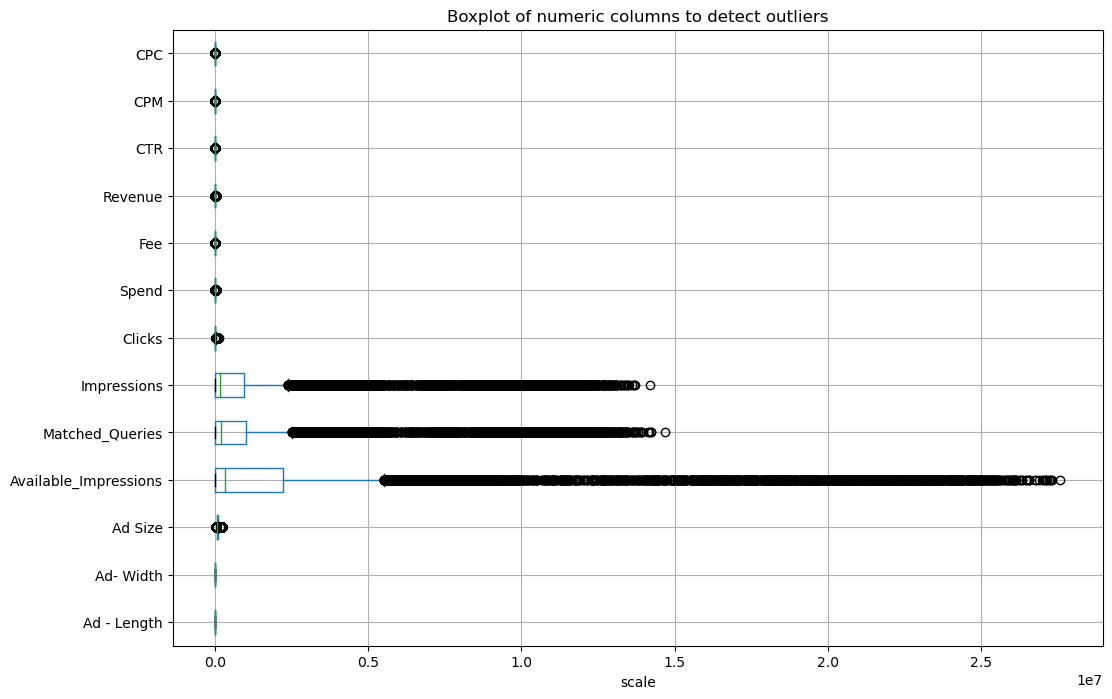

In [21]:
# Specifying only the columns for which outliers detection is needed 
outliers_detection = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries', 'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

# Creating a boxplot to visualise outliers
plt.figure(figsize=(12, 8))
df[outliers_detection].boxplot(vert=False)
plt.title('Boxplot of numeric columns to detect outliers')
plt.xlabel('scale')
plt.show()

we can observe that there are too many outliers in impressions ,matched queries and available impressions attributes amd it is advisable to treat the outliers from my opinion for further maxhine learning techniques 

let us go ahead and see a better graph to see the outliers 

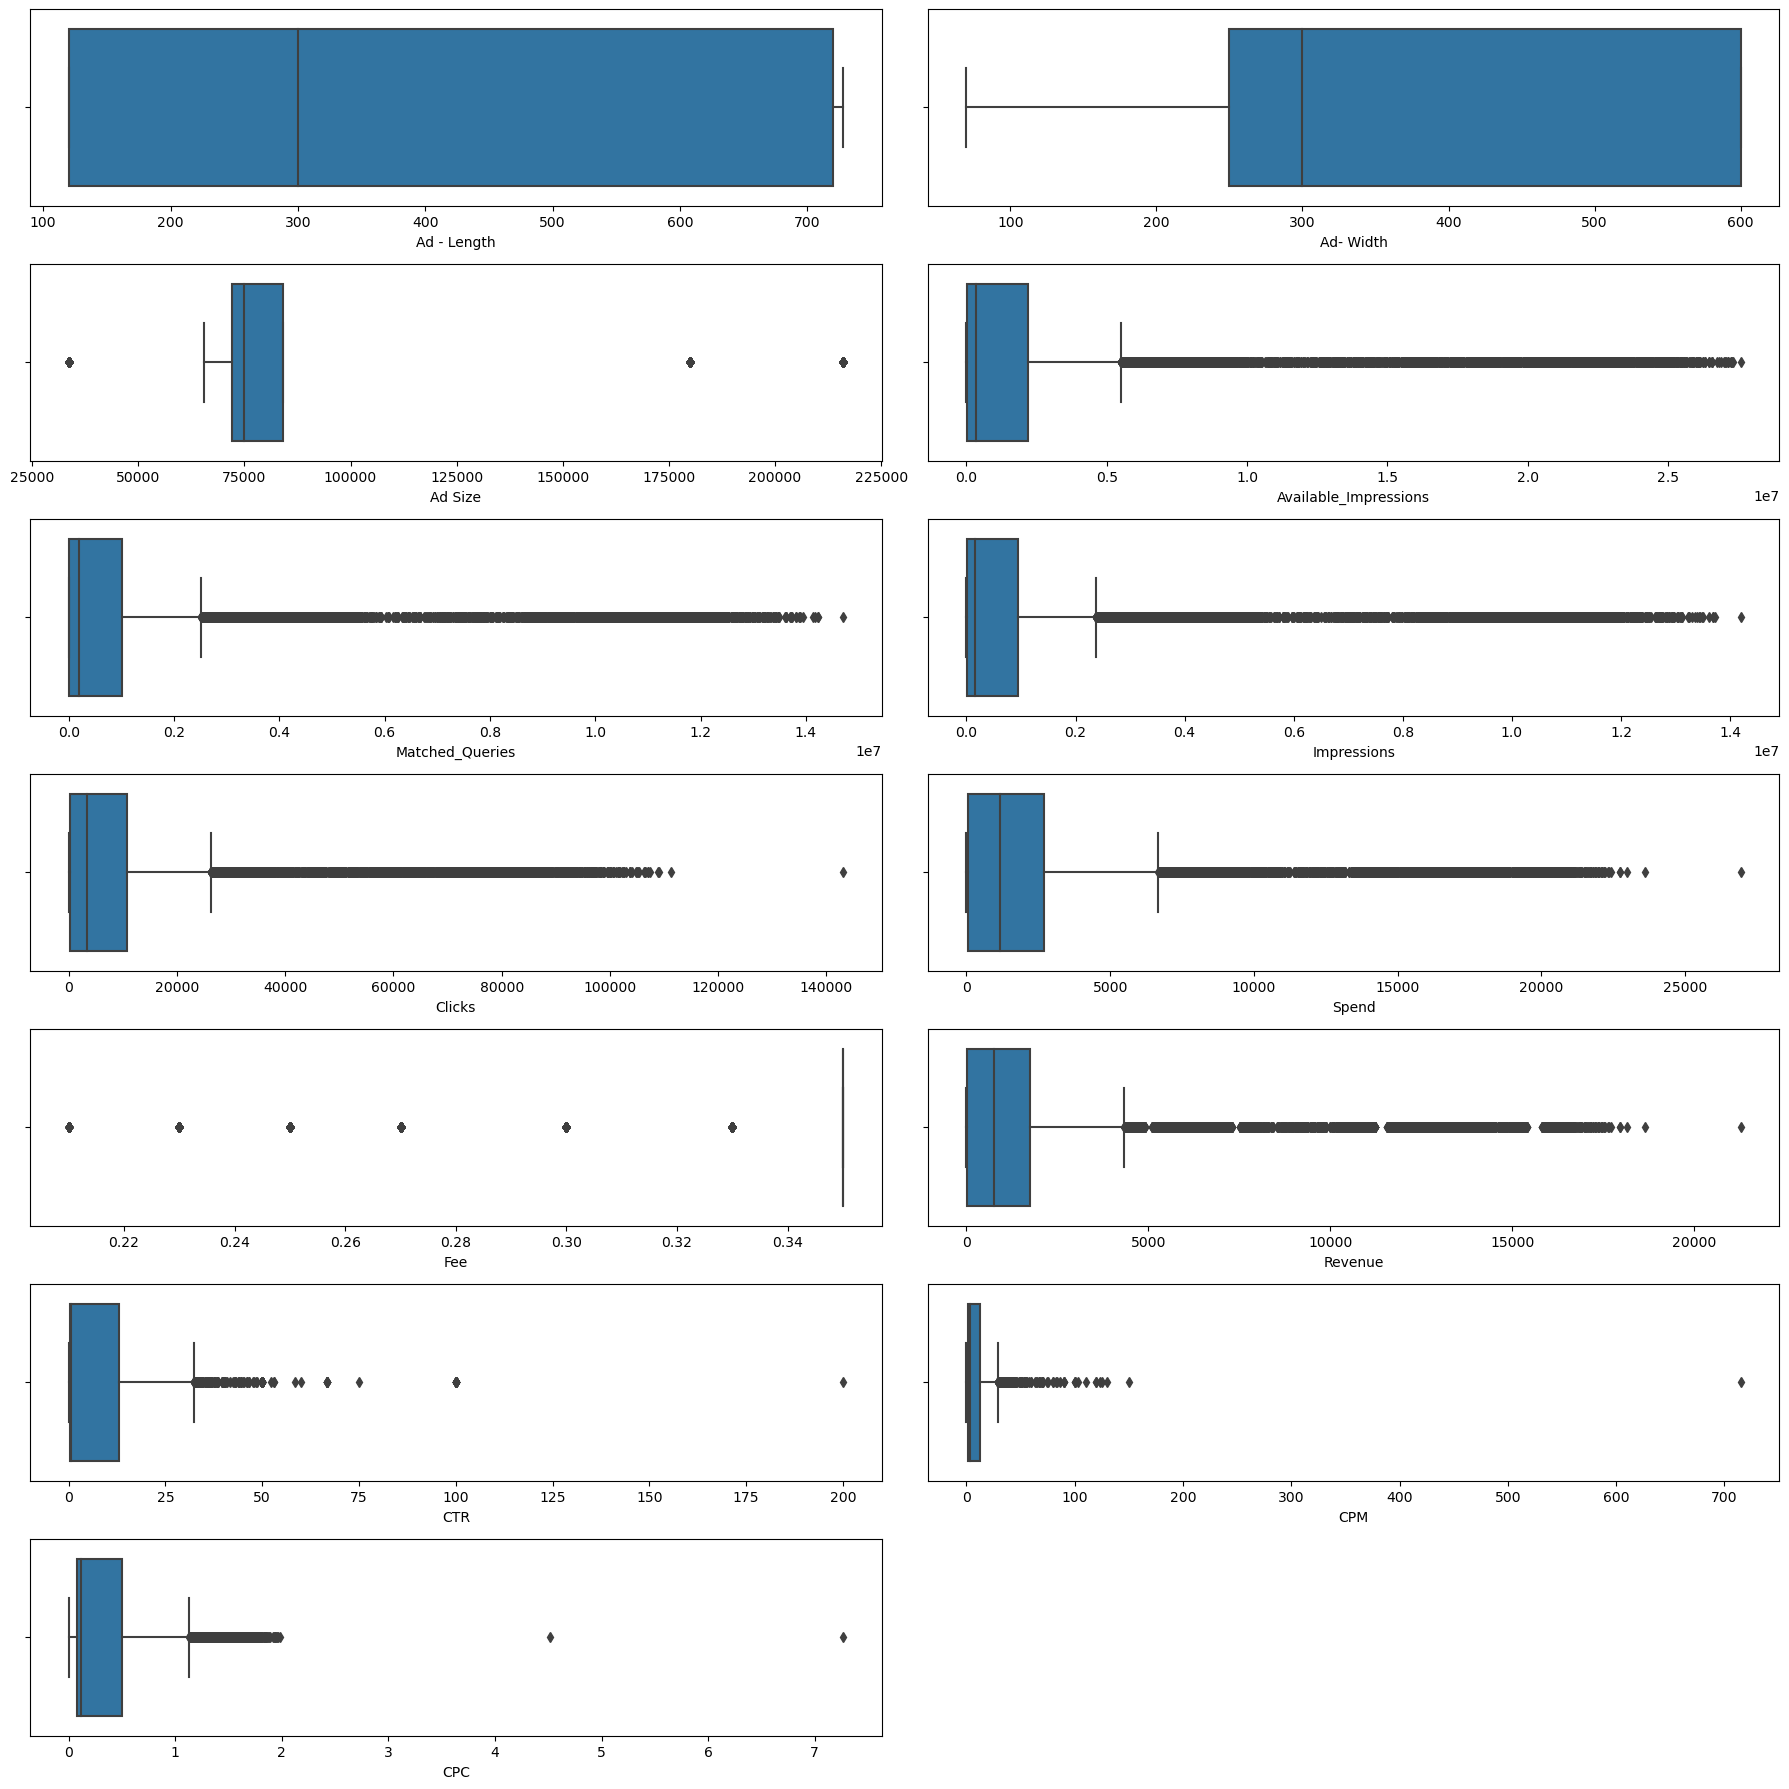

In [22]:

clust_num_col = df.select_dtypes(['int64', 'float64']).columns
num_plots = len(clust_num_col)

num_rows = 7
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))
axes = axes.flatten()

for i in range(num_plots):
    sns.boxplot(x=df[clust_num_col[i]], ax=axes[i])
    axes[i].set_xlabel(clust_num_col[i])

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

here we can see there are outliers in many attributes lets solve this 


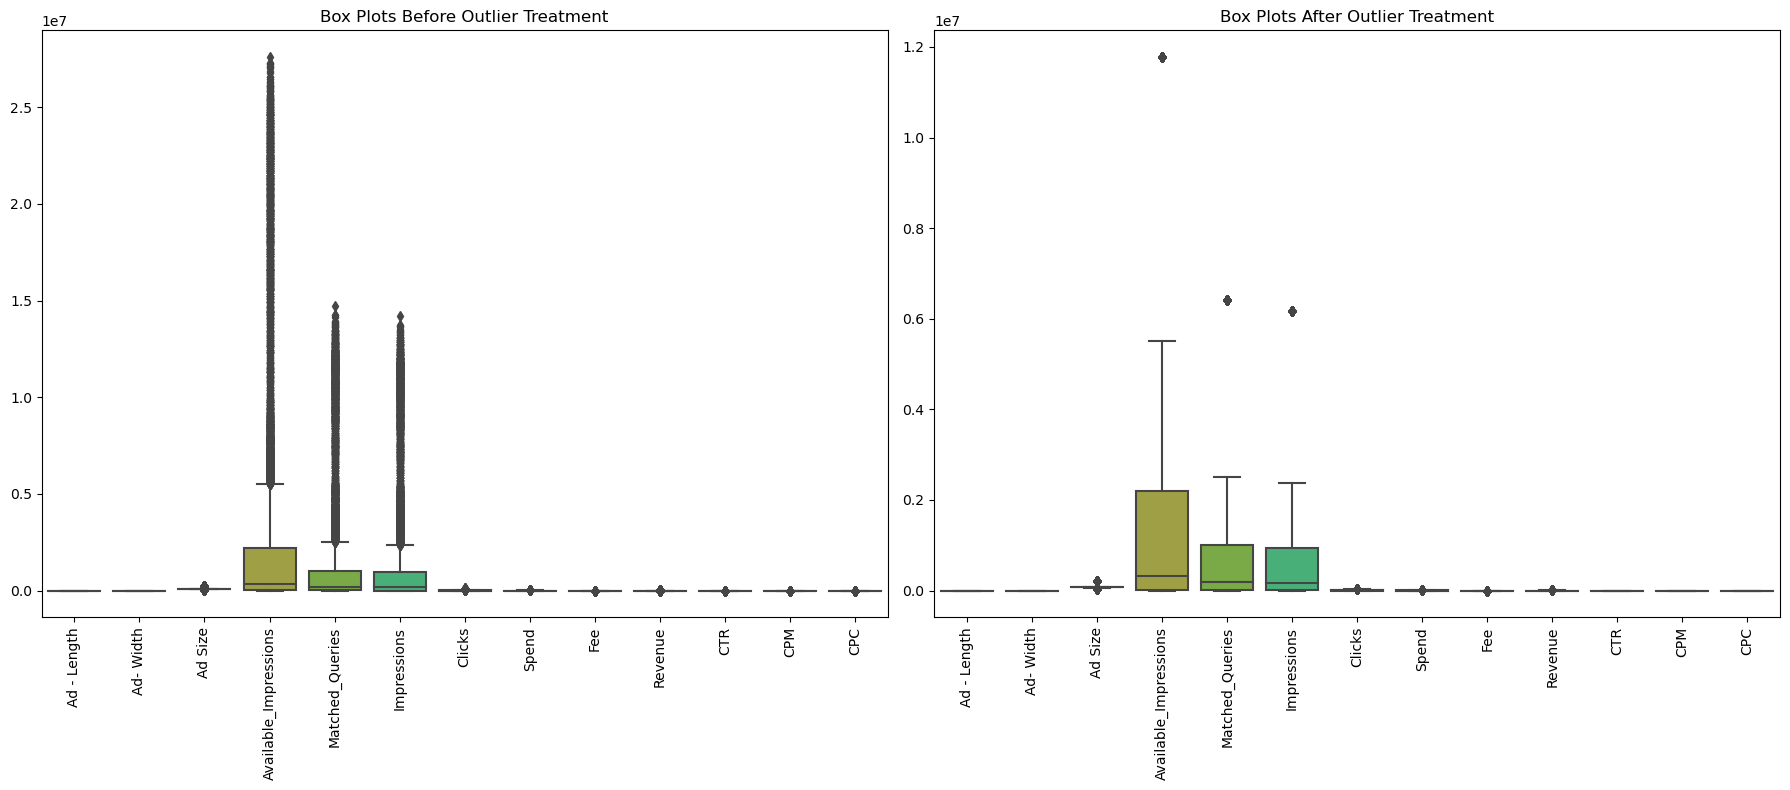

In [23]:
 def treat_outlier(x):
    q5 = np.percentile(x, 5)
    q25 = np.percentile(x, 25)
    q75 = np.percentile(x, 75)
    q95 = np.percentile(x, 95)
    IQR = q75 - q25
    lower_bound = q25 - (1.5 * IQR)
    upper_bound = q75 + (1.5 * IQR)
    return x.apply(lambda y: q5 if y < lower_bound else y).apply(lambda y: q95 if y > upper_bound else y)


attributes_with_outliers = ['Ad - Length', 'Ad- Width', 'Ad Size', 'Available_Impressions', 'Matched_Queries',
                            'Impressions', 'Clicks', 'Spend', 'Fee', 'Revenue', 'CTR', 'CPM', 'CPC']

# lets create a copy of the original DataFrame and apply outliers treatment to that .
df_copy = df.copy()

# Increasing the size 
plt.figure(figsize=(18, 8))

# Before outlier treatment
plt.subplot(1, 2, 1)
sns.boxplot(data=df[attributes_with_outliers])
plt.title('Box Plots Before Outlier Treatment')
plt.xticks(rotation=90)

# Applying outlier treatment to the copy
df_copy[attributes_with_outliers] = df_copy[attributes_with_outliers].apply(treat_outlier)

# After outlier treatment
plt.subplot(1, 2, 2)
sns.boxplot(data=df_copy[attributes_with_outliers])
plt.title('Box Plots After Outlier Treatment')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


# checking for the outliers after the treatment 

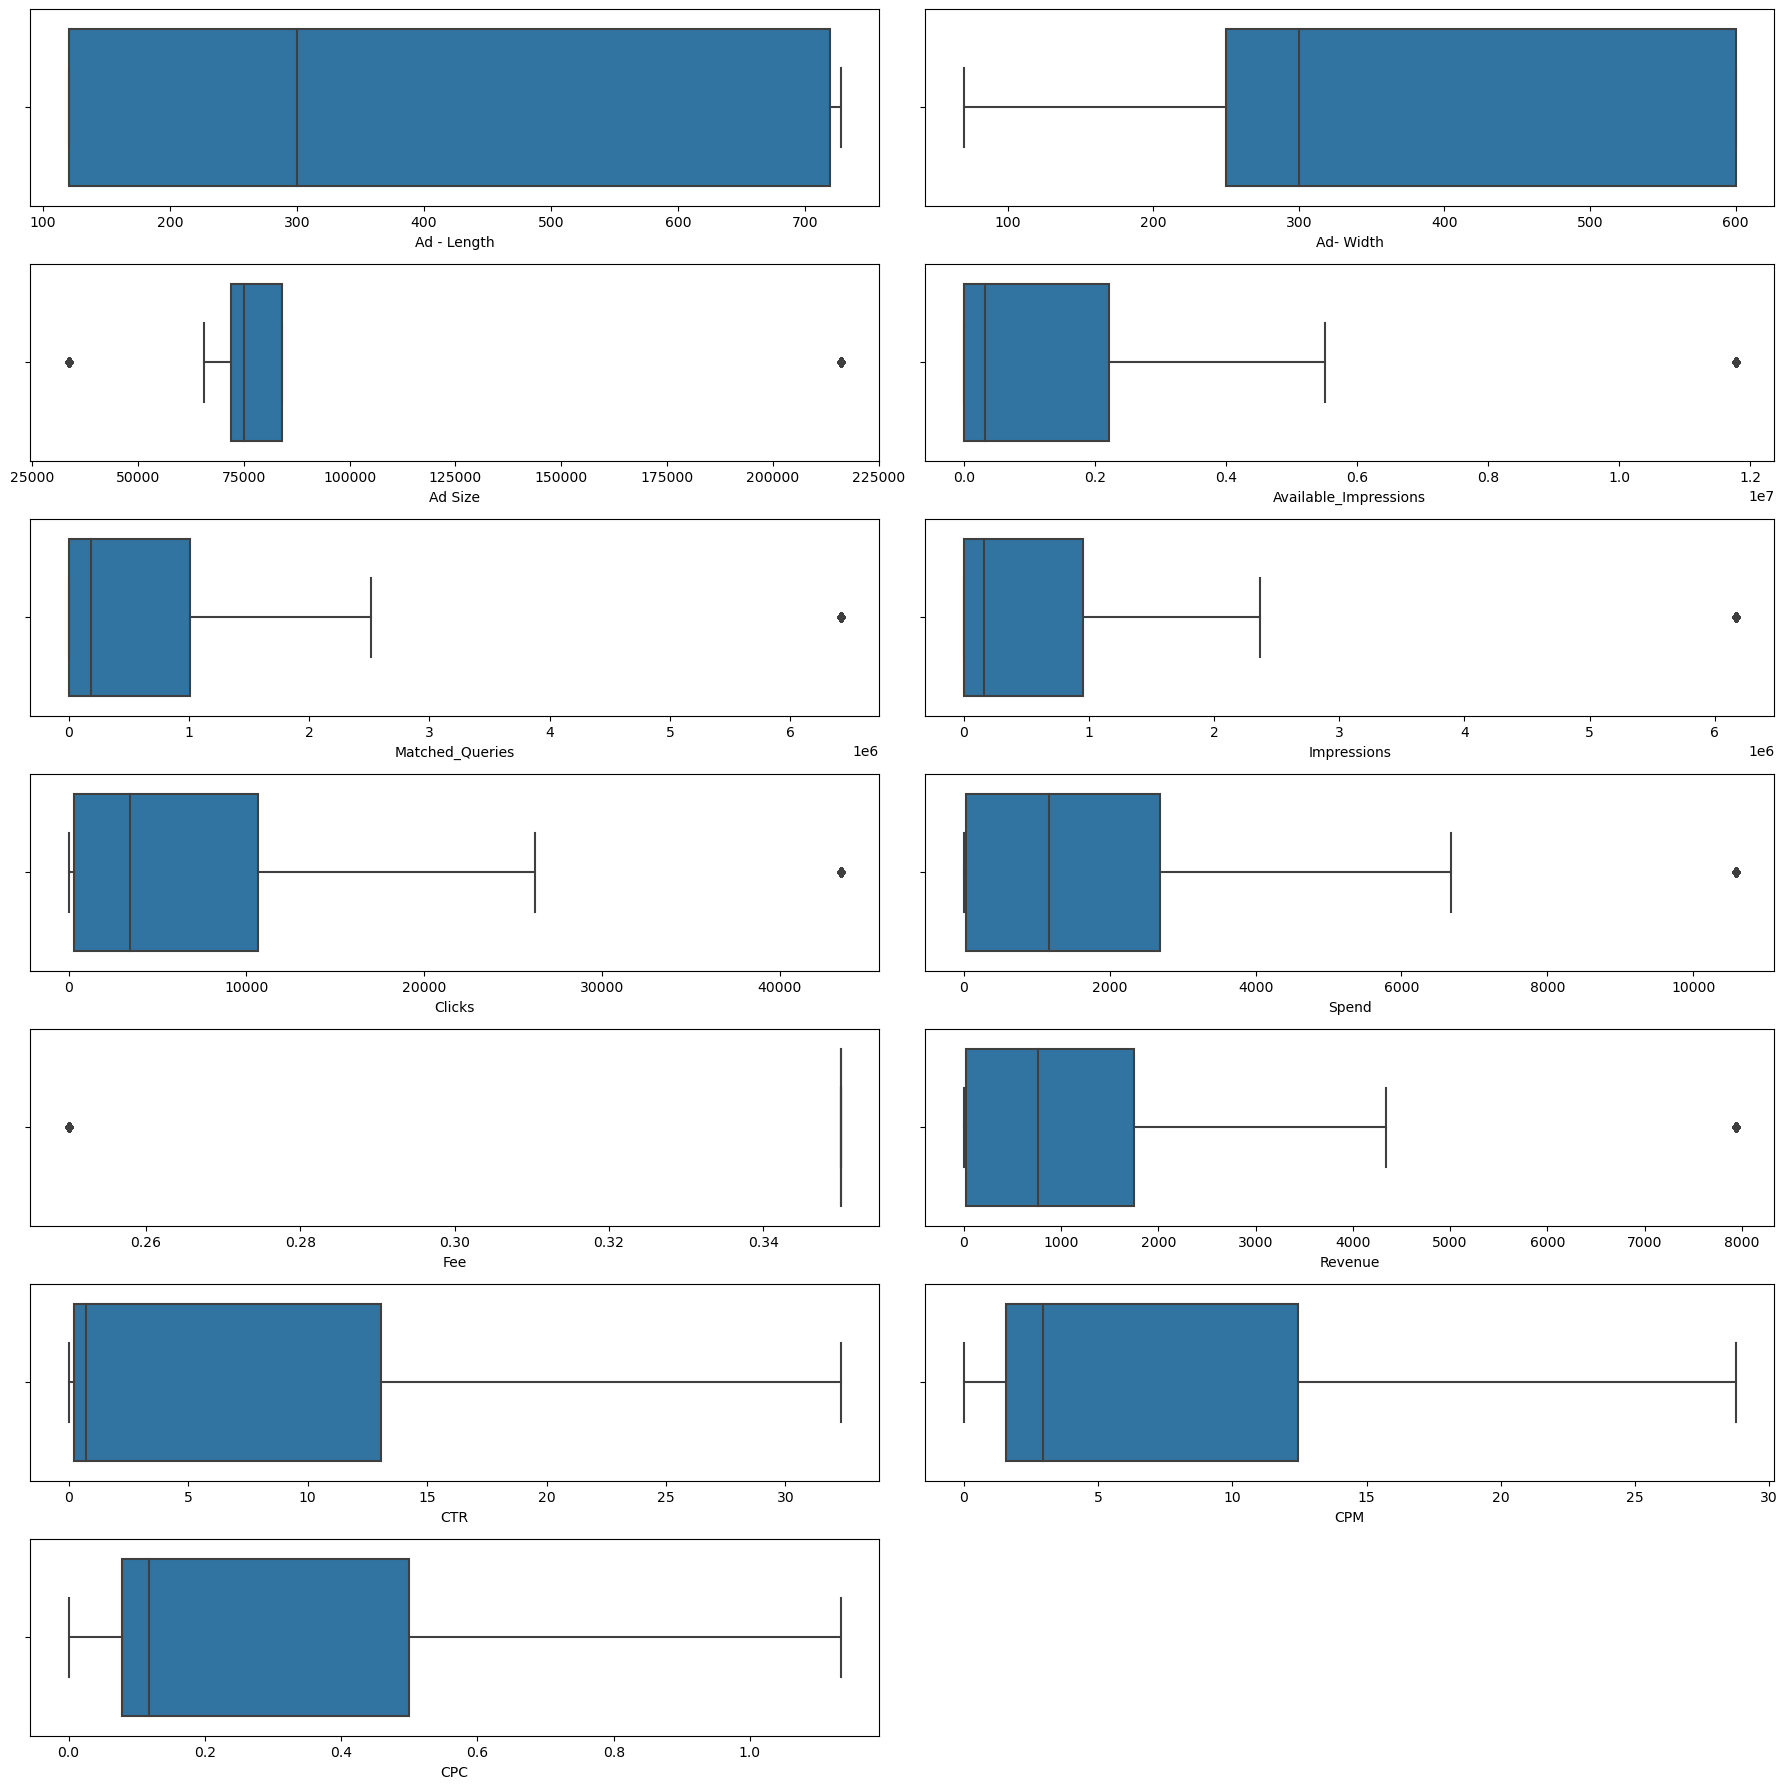

In [24]:

clust_num_col = df_copy.select_dtypes(['int64', 'float64']).columns
num_plots = len(clust_num_col)

num_rows = 7
num_cols = 2

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 18))
axes = axes.flatten()

for i in range(num_plots):
    sns.boxplot(x=df_copy[clust_num_col[i]], ax=axes[i])
    axes[i].set_xlabel(clust_num_col[i])

for i in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[i])

plt.tight_layout()

the outlier treatment has been done 

In [25]:
df_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
Ad - Length,25857.0,3.904312e+02,2.306961e+02,120.00,120.000000,300.000000,7.200000e+02,7.280000e+02
Ad- Width,25857.0,3.321828e+02,1.942609e+02,70.00,250.000000,300.000000,6.000000e+02,6.000000e+02
Ad Size,25857.0,1.007372e+05,6.426503e+04,33600.00,72000.000000,75000.000000,8.400000e+04,2.160000e+05
Available_Impressions,25857.0,2.039143e+06,3.613810e+06,0.00,9133.000000,330968.000000,2.208484e+06,1.177823e+07
Matched_Queries,25857.0,1.183298e+06,2.119857e+06,0.00,5451.000000,189449.000000,1.008171e+06,6.418709e+06
Impressions,25857.0,1.140702e+06,2.059336e+06,0.00,2558.000000,162162.000000,9.496930e+05,6.168280e+06
Clicks,25857.0,8.461565e+03,1.221850e+04,0.00,305.000000,3457.000000,1.068100e+04,4.342620e+04
Spend,25857.0,2.215811e+03,3.110353e+03,0.00,36.030000,1173.660000,2.692280e+03,1.058262e+04
Fee,25857.0,3.270855e-01,4.202908e-02,0.25,0.350000,0.350000,3.500000e-01,3.500000e-01
Revenue,25857.0,1.582113e+03,2.356799e+03,0.00,23.420000,762.880000,1.749982e+03,7.936968e+03


# Part 1 - Clustering: Perform z-score scaling and discuss how it affects the speed of the algorithm.

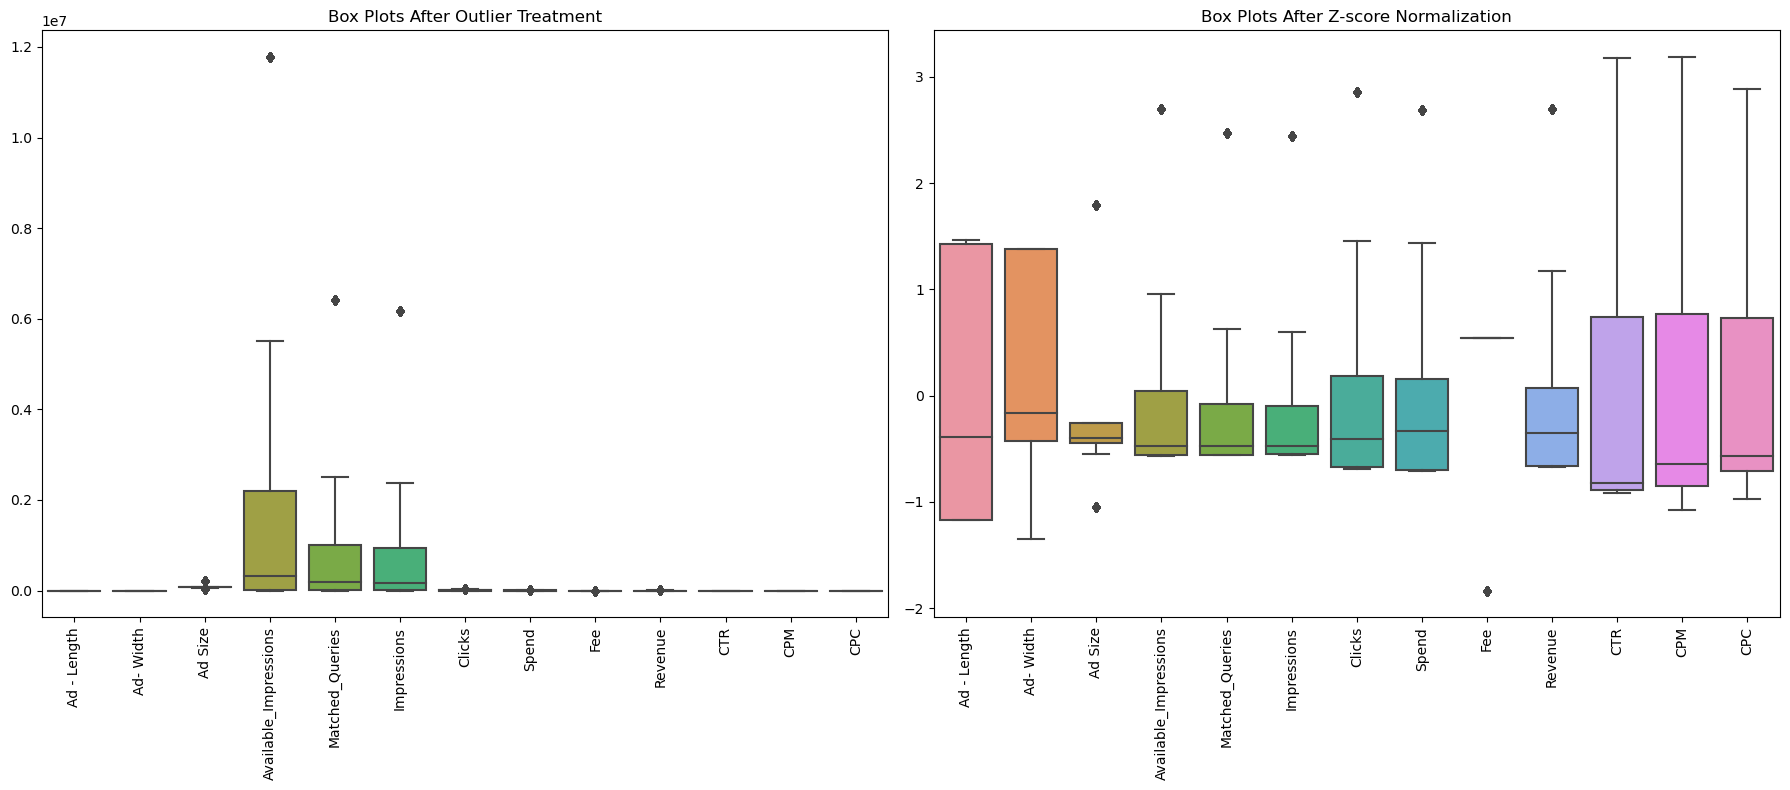

In [26]:
df_zscore = df_copy.copy()
df_zscore[attributes_with_outliers] = zscore(df_copy[attributes_with_outliers])

# Visualize box plots before and after Z-score normalization
plt.figure(figsize=(18, 8))

# Before Z-score normalization
plt.subplot(1, 2, 1)
sns.boxplot(data=df_copy[attributes_with_outliers])
plt.title('Box Plots After Outlier Treatment')
plt.xticks(rotation=90)

# After Z-score normalization
plt.subplot(1, 2, 2)
sns.boxplot(data=df_zscore[attributes_with_outliers])
plt.title('Box Plots After Z-score Normalization')
plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [27]:
df_zscore


,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,2020-9-2-17,Format1,-0.392000,-0.423062,-0.400493,Inter222,Video,Desktop,Display,-0.563775,-0.558055,-0.553771,-0.692453,-0.712412,0.545216,-0.671310,-0.875066,-1.080352,-0.972460
1,2020-9-2-18,Format1,-0.392000,-0.423062,-0.400493,Inter223,Web,Mobile,Display,-0.563727,-0.558027,-0.553744,-0.692534,-0.712412,0.545216,-0.671310,-0.914294,-1.080352,-0.972460
2,2020-9-3-16,Format6,-0.235948,-0.423062,-0.260446,Inter217,Web,Desktop,Video,-0.563842,-0.558067,-0.553784,-0.692534,-0.712412,0.545216,-0.671310,-0.914294,-1.080352,-0.972460
3,2020-9-3-2,Format1,-0.392000,-0.423062,-0.400493,Inter224,Web,Desktop,Display,-0.564097,-0.558159,-0.553879,-0.692534,-0.712412,0.545216,-0.671310,-0.914294,-1.080352,-0.972460
4,2020-9-3-13,Format1,-0.392000,-0.423062,-0.400493,Inter225,Video,Mobile,Display,-0.563846,-0.558044,-0.553761,-0.692534,-0.712412,0.545216,-0.671310,-0.914294,-1.080352,-0.972460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,2020-10-1-5,Format5,1.428612,-0.165671,1.793588,Inter222,Video,Desktop,Video,-0.564275,-0.558208,-0.553928,-0.692534,-0.712409,0.545216,-0.671308,-0.914294,0.403993,-0.972460
25853,2020-11-18-2,Format4,-1.172263,1.378674,-0.447176,inter230,Video,Mobile,Video,-0.564273,-0.558208,-0.553928,-0.692453,-0.712390,0.545216,-0.671291,1.996419,1.888337,-0.734119
25854,2020-9-14-0,Format5,1.428612,-0.165671,1.793588,Inter221,App,Mobile,Video,-0.564274,-0.558207,-0.553927,-0.692453,-0.712383,0.545216,-0.671286,1.996419,1.888337,-0.666022
25855,2020-9-30-4,Format7,-0.392000,1.378674,1.793588,Inter228,Video,Mobile,Display,-0.564275,-0.558208,-0.553928,-0.692534,-0.712409,0.545216,-0.671308,-0.914294,0.403993,-0.972460


Z-score scaling, also known as Z-score normalization or standardization, is a common technique in data preprocessing that transforms features by scaling them to have a mean of 0 and a standard deviation of 1. 


Improves Convergence Speed for Gradient Descent:

In machine learning algorithms that use gradient descent optimization (e.g., linear regression, logistic regression, neural networks), Z-score scaling can improve the convergence speed. Standardizing the features ensures that the optimization algorithm doesn't take longer to converge along one dimension compared to another.
Enhances Stability for Some Algorithms:

Z-score scaling can lead to better numerical stability, especially for algorithms that involve distance calculations or rely on numerical optimization. It helps prevent issues like floating-point overflow or underflow.
Makes Algorithms Less Sensitive to Scale:

Some algorithms, such as k-means clustering or k-nearest neighbors, are sensitive to the scale of the features. Z-score scaling makes these algorithms less sensitive to the scale of individual features, improving their performance.
Facilitates Interpretability:

For models that involve regularization (e.g., L1 or L2 regularization), Z-score scaling helps ensure that the regularization term applies fairly to all features, making the model more interpretable.
Doesn't Impact Tree-Based Models as Much:

Tree-based models (e.g., decision trees, random forests, gradient boosting) are generally less sensitive to feature scaling because they make decisions based on relative feature importances. Z-score scaling might not significantly impact the speed of these algorithms.
Can Be Computationally Expensive:

Computing the mean and standard deviation for each feature in the dataset can be computationally expensive, especially for large datasets. However, this cost is usually a one-time preprocessing step.
Not Always Necessary for All Algorithms:

Some algorithms, like support vector machines with a radial basis function (RBF) kernel, might work well without Z-score scaling. It's essential to check the algorithm's documentation and experiment to see if scaling provides noticeable benefits.








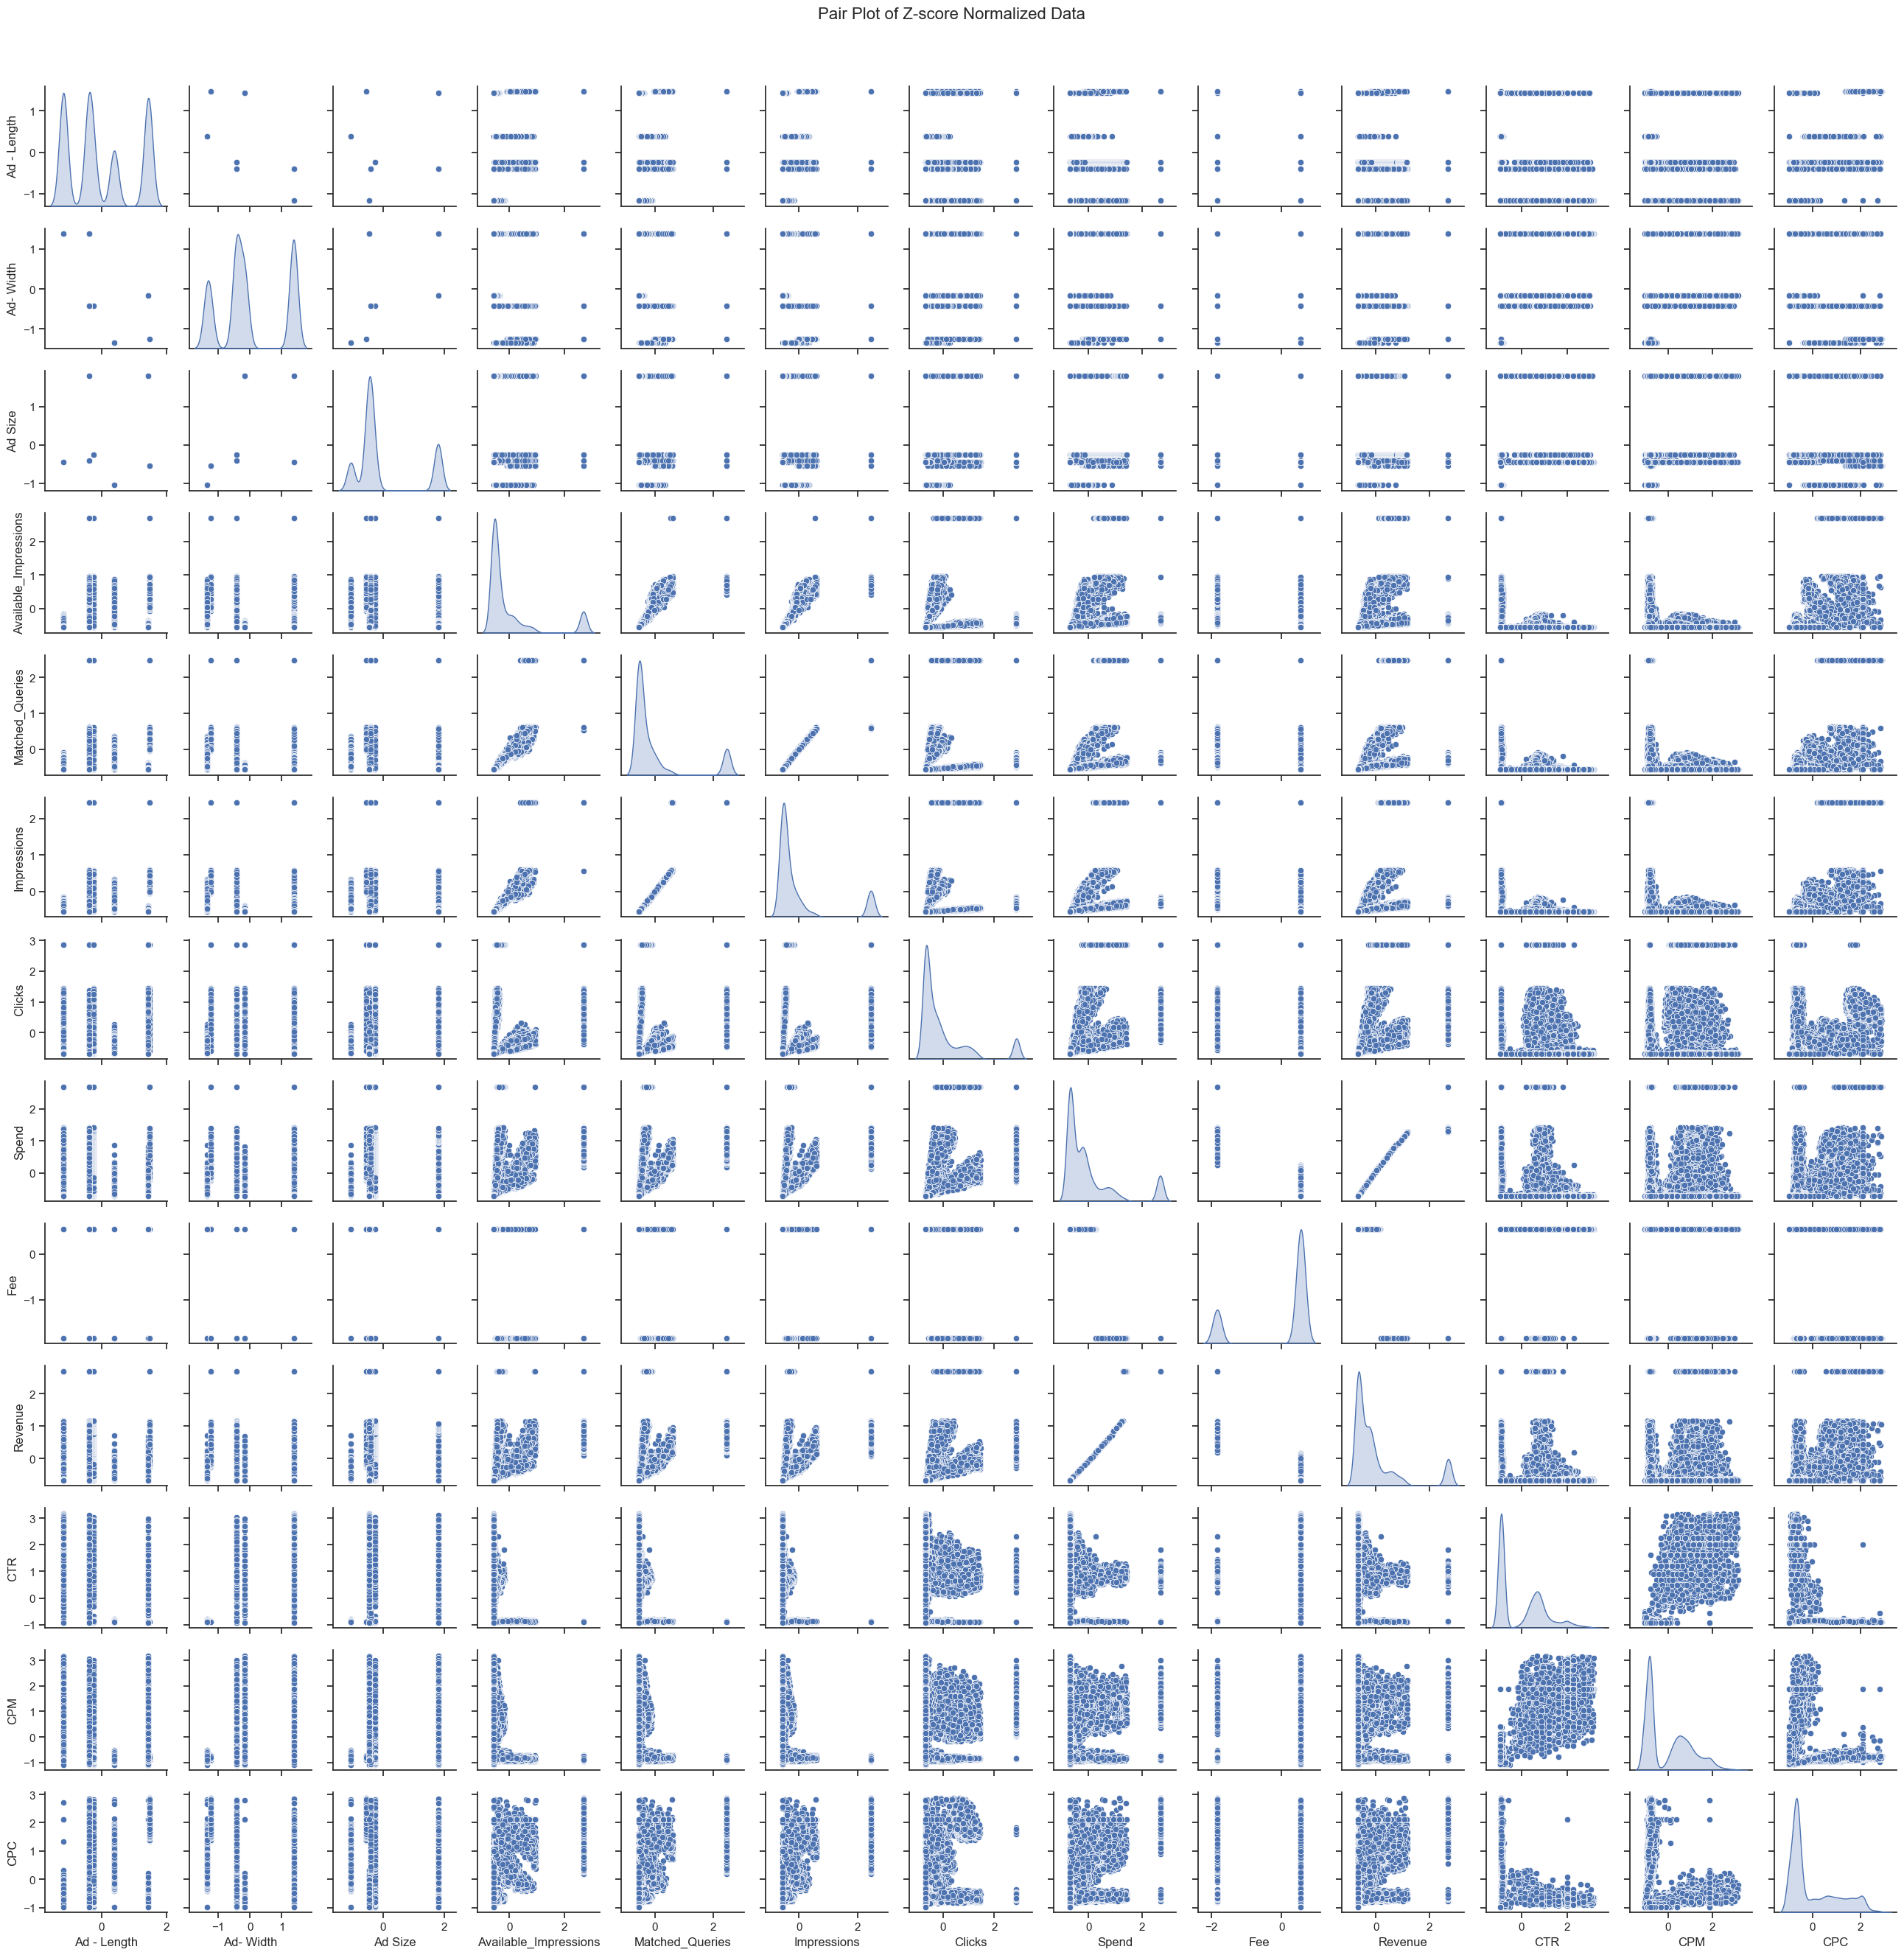

In [28]:
sns.set(style="ticks")
sns.pairplot(df_zscore, diag_kind='kde', height=2)
plt.suptitle("Pair Plot of Z-score Normalized Data", y=1.02, fontsize=16)
plt.tight_layout()
plt.show()

# Part 1 - Clustering: Perform Hierarchical by constructing a Dendrogram using WARD and Euclidean distance.

In [29]:
df_int = df_zscore.select_dtypes(include=["int64", "float64"])
df_int

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.392000,-0.423062,-0.400493,-0.563775,-0.558055,-0.553771,-0.692453,-0.712412,0.545216,-0.671310,-0.875066,-1.080352,-0.972460
1,-0.392000,-0.423062,-0.400493,-0.563727,-0.558027,-0.553744,-0.692534,-0.712412,0.545216,-0.671310,-0.914294,-1.080352,-0.972460
2,-0.235948,-0.423062,-0.260446,-0.563842,-0.558067,-0.553784,-0.692534,-0.712412,0.545216,-0.671310,-0.914294,-1.080352,-0.972460
3,-0.392000,-0.423062,-0.400493,-0.564097,-0.558159,-0.553879,-0.692534,-0.712412,0.545216,-0.671310,-0.914294,-1.080352,-0.972460
4,-0.392000,-0.423062,-0.400493,-0.563846,-0.558044,-0.553761,-0.692534,-0.712412,0.545216,-0.671310,-0.914294,-1.080352,-0.972460
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25852,1.428612,-0.165671,1.793588,-0.564275,-0.558208,-0.553928,-0.692534,-0.712409,0.545216,-0.671308,-0.914294,0.403993,-0.972460
25853,-1.172263,1.378674,-0.447176,-0.564273,-0.558208,-0.553928,-0.692453,-0.712390,0.545216,-0.671291,1.996419,1.888337,-0.734119
25854,1.428612,-0.165671,1.793588,-0.564274,-0.558207,-0.553927,-0.692453,-0.712383,0.545216,-0.671286,1.996419,1.888337,-0.666022
25855,-0.392000,1.378674,1.793588,-0.564275,-0.558208,-0.553928,-0.692534,-0.712409,0.545216,-0.671308,-0.914294,0.403993,-0.972460


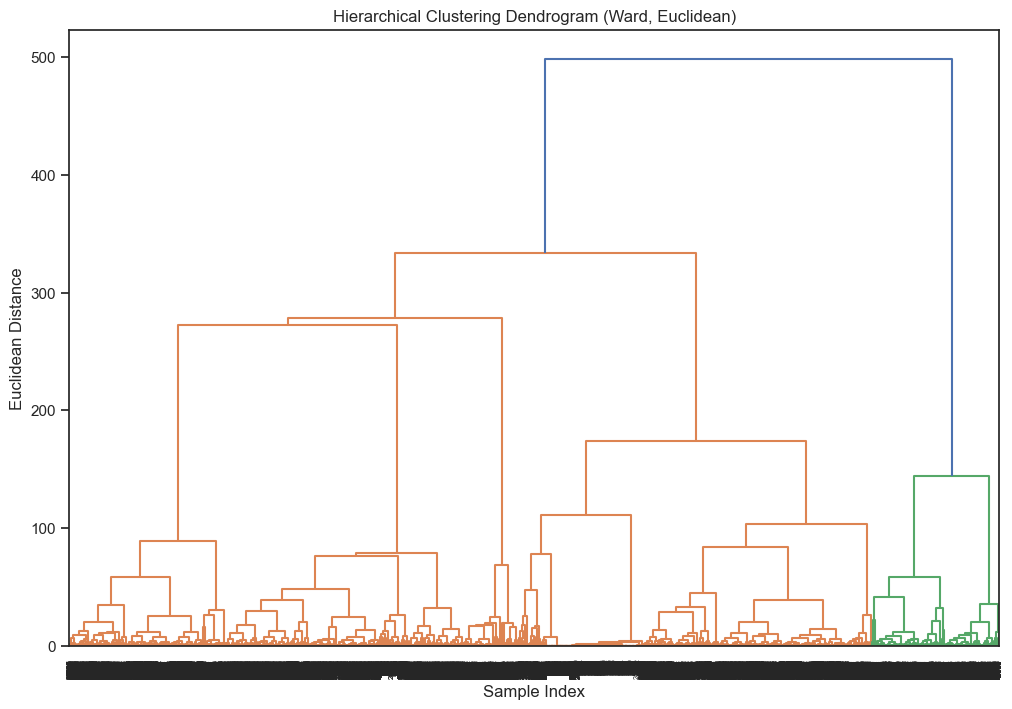

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage
linkage_matrix = linkage(df_int, method='ward', metric='euclidean')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linkage_matrix, orientation='top', labels=df_int.index, distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Ward, Euclidean)')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')
plt.show()

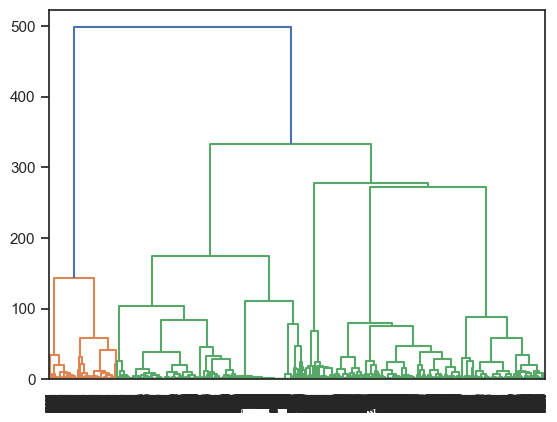

<Figure size 2000x2000 with 0 Axes>

In [31]:
wardlink=linkage(df_int,method="ward", metric='euclidean')
dend= dendrogram(wardlink)
plt.figure(figsize=(20, 20))
plt.show()

# Part 1 - Clustering: Make Elbow plot (up to n=10) and identify optimum number of clusters for k-means algorithm.

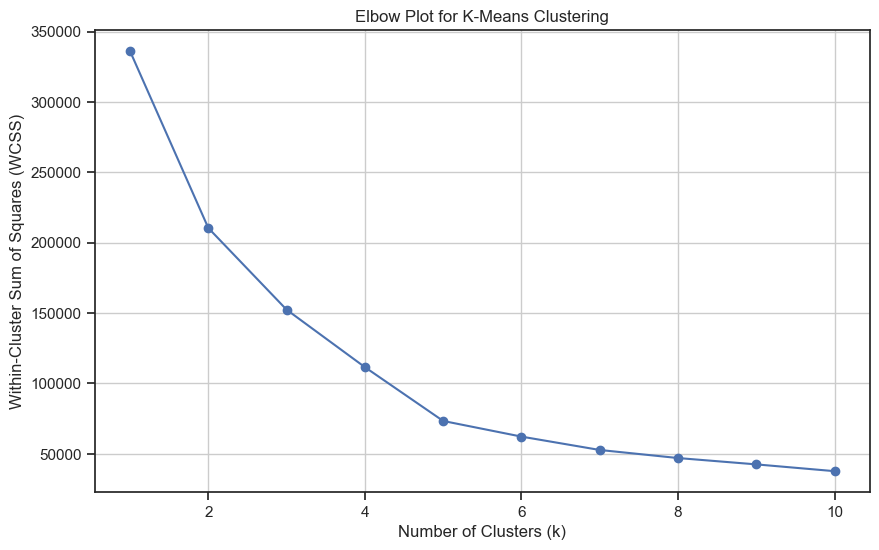

In [32]:
wcss = []

#(specifying the range of number of clusters)
k_values = range(1, 11)

# Calculating WCSS for each k
for k in k_values:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(df_int)
    wcss.append(kmeans.inertia_)

# to Plot the Elbow plot
plt.figure(figsize=(10, 6))
plt.plot(k_values, wcss, marker='o', linestyle='-', color='b')
plt.title('Elbow Plot for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

by analysing the plot we can say that 5 or 6 clusters are best 


In [33]:
df_int.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC
0,-0.392000,-0.423062,-0.400493,-0.563775,-0.558055,-0.553771,-0.692453,-0.712412,0.545216,-0.67131,-0.875066,-1.080352,-0.97246
1,-0.392000,-0.423062,-0.400493,-0.563727,-0.558027,-0.553744,-0.692534,-0.712412,0.545216,-0.67131,-0.914294,-1.080352,-0.97246
2,-0.235948,-0.423062,-0.260446,-0.563842,-0.558067,-0.553784,-0.692534,-0.712412,0.545216,-0.67131,-0.914294,-1.080352,-0.97246
3,-0.392000,-0.423062,-0.400493,-0.564097,-0.558159,-0.553879,-0.692534,-0.712412,0.545216,-0.67131,-0.914294,-1.080352,-0.97246
4,-0.392000,-0.423062,-0.400493,-0.563846,-0.558044,-0.553761,-0.692534,-0.712412,0.545216,-0.67131,-0.914294,-1.080352,-0.97246


# Part 1 - Clustering: Print silhouette scores for up to 10 clusters and identify optimum number of clusters.

In [34]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
k_values = range(2, 11) 


for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_int)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df_int, labels)
    silhouette_scores.append(silhouette_avg)

# Finding the optimal number of clusters based on maximum silhouette score
optimal_k = k_values[silhouette_scores.index(max(silhouette_scores))]

# Printing silhouette scores
for k, score in zip(k_values, silhouette_scores):
    print(f"Number of clusters (k): {k}, Silhouette Score: {score:.4f}")


print(f"\nOptimal Number of Clusters: {optimal_k}")





Number of clusters (k): 2, Silhouette Score: 0.4547
Number of clusters (k): 3, Silhouette Score: 0.3636
Number of clusters (k): 4, Silhouette Score: 0.4578
Number of clusters (k): 5, Silhouette Score: 0.5216
Number of clusters (k): 6, Silhouette Score: 0.5247
Number of clusters (k): 7, Silhouette Score: 0.5060
Number of clusters (k): 8, Silhouette Score: 0.5097
Number of clusters (k): 9, Silhouette Score: 0.4880
Number of clusters (k): 10, Silhouette Score: 0.5383

Optimal Number of Clusters: 10


we can see that 10 clusters and 6 clusters have almost the same score so its better to choose 6 clusters as the optimum one 

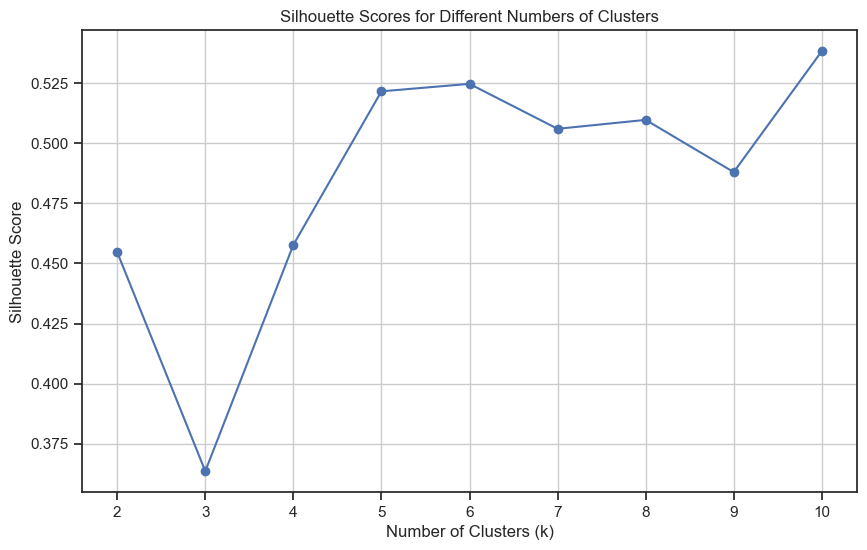

In [35]:
plt.figure(figsize=(10, 6))
plt.plot(k_values, silhouette_scores, marker='o', linestyle='-', color='b')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

hence we can find out that 6 clusters are optimum 

In [36]:
# running a k means algorithm for 6 clusters 
k = 6
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(df_int)

#cluster assignments for each data point
cluster_assignments = kmeans.labels_

#cluster assignments to DataFrame
df_int['Cluster'] = cluster_assignments

print(df_int['Cluster'].value_counts())

0    7779
2    6697
1    5567
3    2680
5    1592
4    1542
Name: Cluster, dtype: int64


In [37]:
df['Cluster'] = cluster_assignments

In [38]:
df_int.head()

,Ad - Length,Ad- Width,Ad Size,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster
0,-0.392000,-0.423062,-0.400493,-0.563775,-0.558055,-0.553771,-0.692453,-0.712412,0.545216,-0.67131,-0.875066,-1.080352,-0.97246,0
1,-0.392000,-0.423062,-0.400493,-0.563727,-0.558027,-0.553744,-0.692534,-0.712412,0.545216,-0.67131,-0.914294,-1.080352,-0.97246,0
2,-0.235948,-0.423062,-0.260446,-0.563842,-0.558067,-0.553784,-0.692534,-0.712412,0.545216,-0.67131,-0.914294,-1.080352,-0.97246,0
3,-0.392000,-0.423062,-0.400493,-0.564097,-0.558159,-0.553879,-0.692534,-0.712412,0.545216,-0.67131,-0.914294,-1.080352,-0.97246,0
4,-0.392000,-0.423062,-0.400493,-0.563846,-0.558044,-0.553761,-0.692534,-0.712412,0.545216,-0.67131,-0.914294,-1.080352,-0.97246,0


In [39]:
df.head()

,Timestamp,InventoryType,Ad - Length,Ad- Width,Ad Size,Ad Type,Platform,Device Type,Format,Available_Impressions,Matched_Queries,Impressions,Clicks,Spend,Fee,Revenue,CTR,CPM,CPC,Cluster
0,2020-9-2-17,Format1,300,250,75000,Inter222,Video,Desktop,Display,1806,325,323,1,0.0,0.35,0.0,0.309598,0.0,0.0,0
1,2020-9-2-18,Format1,300,250,75000,Inter223,Web,Mobile,Display,1979,384,380,0,0.0,0.35,0.0,0.000000,0.0,0.0,0
2,2020-9-3-16,Format6,336,250,84000,Inter217,Web,Desktop,Video,1566,298,297,0,0.0,0.35,0.0,0.000000,0.0,0.0,0
3,2020-9-3-2,Format1,300,250,75000,Inter224,Web,Desktop,Display,643,103,102,0,0.0,0.35,0.0,0.000000,0.0,0.0,0
4,2020-9-3-13,Format1,300,250,75000,Inter225,Video,Mobile,Display,1550,347,345,0,0.0,0.35,0.0,0.000000,0.0,0.0,0


# Part 1 - Clustering: Profile the ads based on optimum number of clusters using silhouette score and your domain understanding [Hint: Group the data by clusters and take sum or mean to identify trends in Clicks, spend, revenue, CPM, CTR, & CPC based on Device Type. Make bar plots].

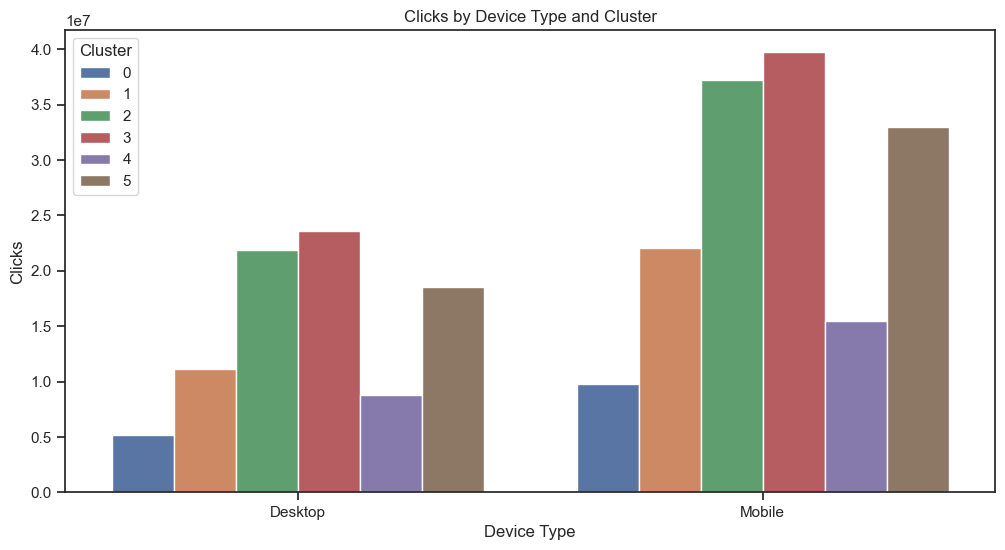

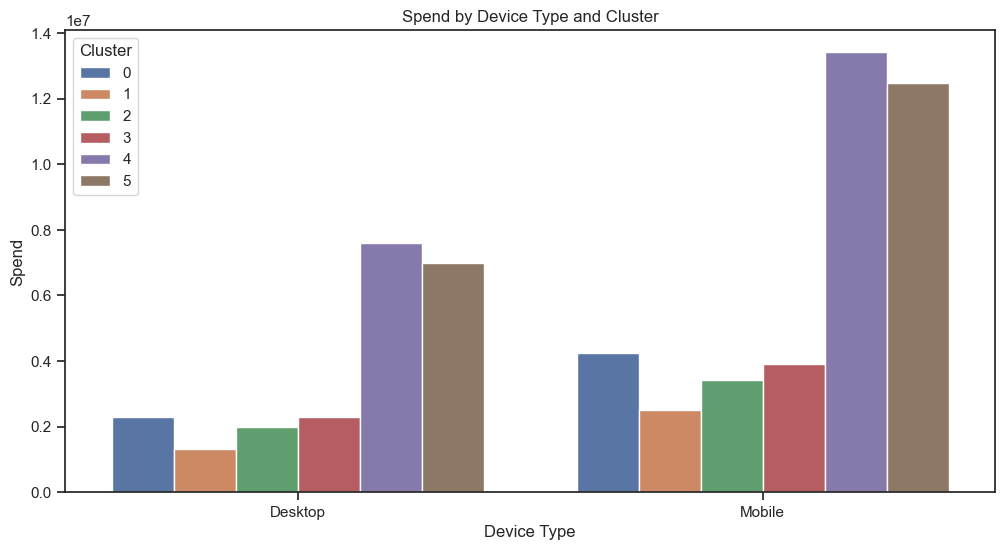

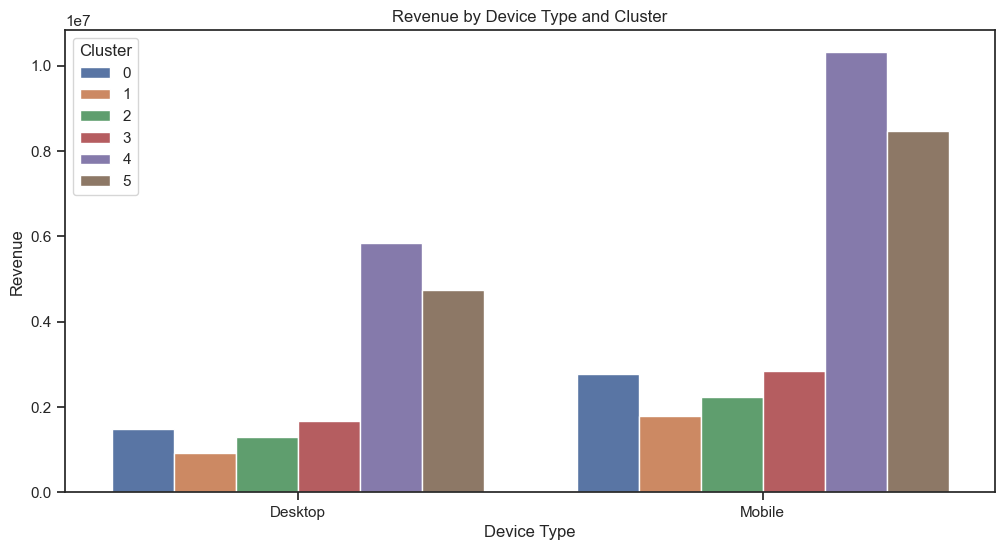

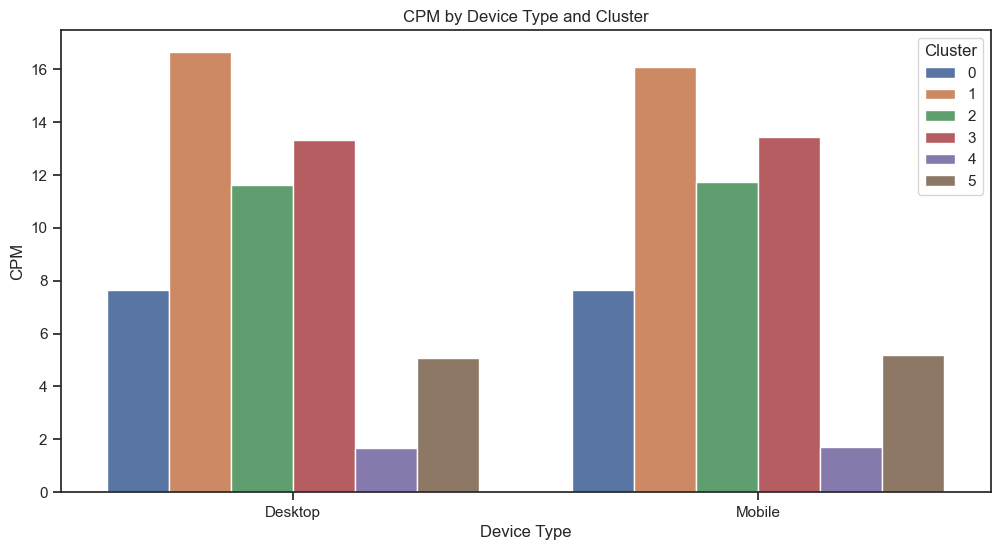

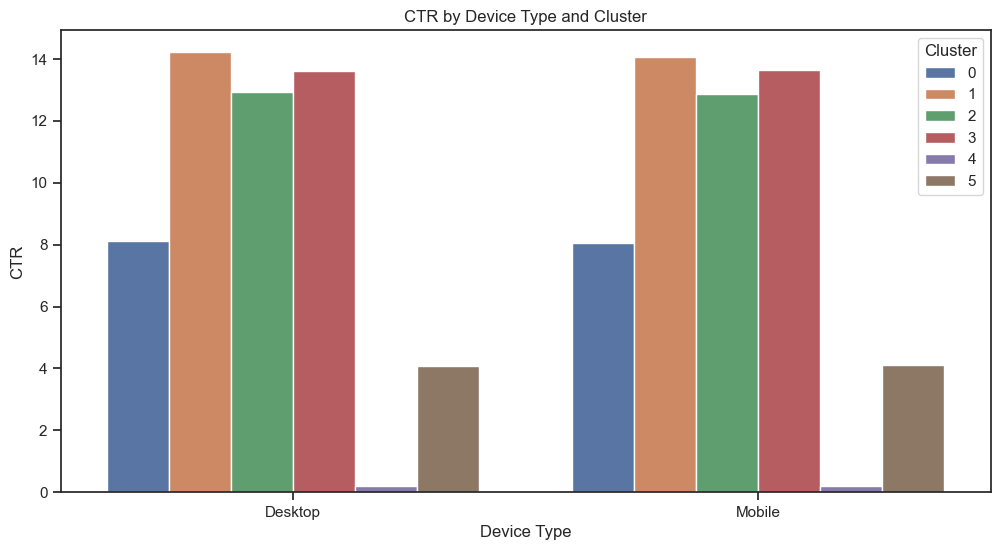

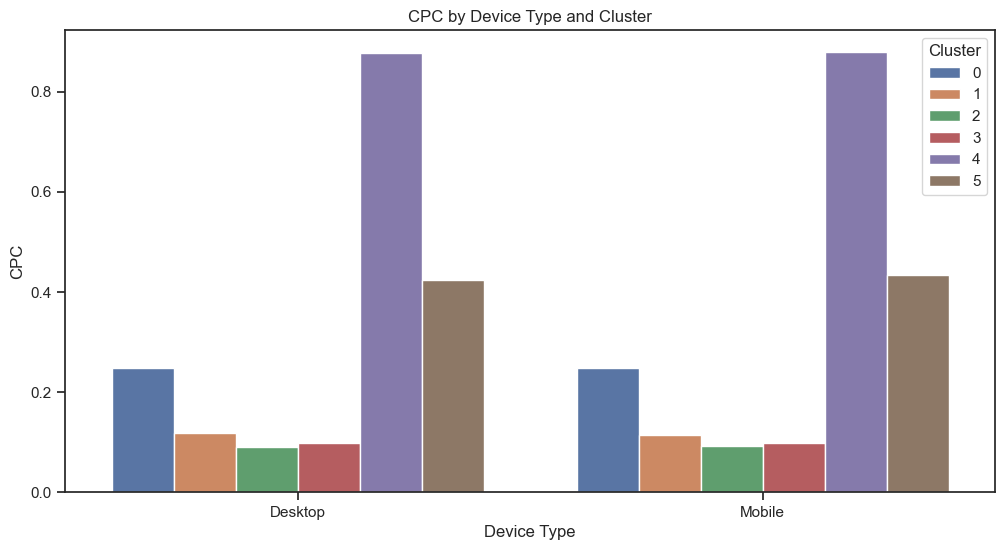

In [40]:

optimal_k = 6 

# selecting specified columns
columns_for_clustering = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC', 'Device Type']

# relevant columns
df_cluster = df[columns_for_clustering].copy()

# Performing KMeans clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_cluster['Cluster'] = kmeans.fit_predict(df_cluster.iloc[:, :-1])  # Exclude 'Device Type' for clustering

# Group data by clusters and Device Type, calculate mean or sum
grouped_data = df_cluster.groupby(['Cluster', 'Device Type']).agg({'Clicks': 'sum', 'Spend': 'sum', 'Revenue': 'sum',
                                                                   'CPM': 'mean', 'CTR': 'mean', 'CPC': 'mean'}).reset_index()

# Plot bar plots for each metric
metrics = ['Clicks', 'Spend', 'Revenue', 'CPM', 'CTR', 'CPC']
for metric in metrics:
    plt.figure(figsize=(12, 6))
    sns.barplot(x='Device Type', y=metric, hue='Cluster', data=grouped_data)
    plt.title(f'{metric} by Device Type and Cluster')
    plt.xlabel('Device Type')
    plt.ylabel(metric)
    plt.legend(title='Cluster')
    plt.show()

# Part 1 - Clustering: Conclude the project by providing summary of your learnings.

## insights for ads24x7 (Digital Marketing company) on the data set provided for analysing the market 

### mobiles and desktops  in cluster 3 are getting the "highest clicks" in device type |
### mobiles and desktops in cluster 2 are getting the  "second highest clicks"  in device type |
### mobiles and desktops  in cluster 5 are getting the " third highest clicks"  in device type |


### mobiles and desktops  in cluster 4 are getting the " highest spends" in device type |
### mobiles and desktops in cluster 5 are getting the  " second highest spends" in device type | although the spends in desktops is comparatively low with respect to mobiles 


### it is observed that these devices in cluster 4 are not even getting clicks but still are having high spends


### revenue is high in cluster 4 and 5 in both mobile and desktops but comparatively mobiles in that cluster have it higher 

### CPM is high for both mobile and desktop in cluster 1,3and 2

### CTR is high for both mobile and desktop in cluster 1,3and 2

### CPC is high for mobile and desktop of cluster 4 and then the next highest is in cluster 5

#### details about CPM ,CPC,and CTR 
CPM = (Total Campaign Spend / Number of Impressions) * 1,000

CPC = Total Cost (spend) / Number of Clicks

CTR = Total Measured Clicks / Total Measured Ad Impressions x 100

CPM (cost per mille), or cost per thousand impressions 

Cost-per-click (CPC) bidding means that you pay for each click on your ads. For CPC bidding campaigns, you set a maximum cost-per-click bid - or simply "max. CPC" - that's the highest amount that you're willing to pay for a click on your ad (unless you're setting bid adjustments, or using Enhanced CPC).


Clickthrough rate (CTR) can be used to gauge how well your keywords and ads, and free listings, are performing
